In [1]:
import kwant
import kwant.continuum
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import scipy
from IPython.display import clear_output

%matplotlib notebook
import csv
from numpy import linalg as LA
import matplotlib as mpl
from pylab import *
from matplotlib.collections import LineCollection

In [2]:
def make_system(a0,length,t,E,VG_e,VG_h,VL,t_b,Vb,L_b):

    # system building
    lat = kwant.lattice.square(a=a0, norbs=1)
    syst = kwant.Builder()

    # central scattering region
    for j in range(length):
        if j<length/2 :
            VG=VG_e
        else:
            VG=VG_h
        
    
        syst[(lat(j, 0))] = 2*t-VG-E*(j/length)
        syst[lat.neighbors()] = -t
    
    for i in range(L_b):
        j=i+(length-L_b)/2
        syst[(lat(j, 0))] = 2*t_b+Vb-E*(j/length)
        syst[lat(j,0), lat(j-1,0)]= -t_b
        syst[lat(j,0), lat(j+1,0)]= -t_b
            

    # add leads
    sym = kwant.TranslationalSymmetry((-a0, 0))
    lead_left = kwant.Builder(sym)
    lead_left[lat(0, 0)] = 2*t-VL+0
    lead_left[lat.neighbors()] = -t
    syst.attach_lead(lead_left)

    sym = kwant.TranslationalSymmetry((a0, 0))
    lead_right = kwant.Builder(sym)
    lead_right[lat(0, 0)] = 2*t-VL-E
    lead_right[lat.neighbors()] = -t
    syst.attach_lead(lead_right)

    return syst

In [3]:
#with open('double_well_Vb=0_Lb=1_a=1.txt', 'w') as f:
    N=51*2
    a=1.0
    L=a*N
    t0=1.0/(a*a)
    #fields = []
    data = []

    energies = np.linspace(-0.2,1.0,500)

    for energy in energies:

        syst = make_system(a0=a,length=N,t=t0,E=energy,VG_e=0.1,VG_h=0.0,VL=0.0,t_b=t0,Vb=0.4,L_b=1).finalized()

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst, 0.01)

        # compute the transmission probability from lead 0 to
        # lead 1
        #field=field/t0
        #fields.append(field)
        data.append(smatrix.transmission(1, 0))
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))

In [4]:
#with open('double_well_Vb=0_Lb=1_a=1.txt', 'w') as f:
    N=51*4
    a=1.0/2.0
    L=a*N
    t0=1.0/(a*a)
    #fields = []
    data2 = []

    energies2 = np.linspace(-0.2,1.0,500)

    for energy in energies2:

        syst = make_system(a0=a,length=N,t=t0,E=energy,VG_e=0.1,VG_h=0.0,VL=0.0,t_b=t0,Vb=0.4,L_b=1*2).finalized()

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst, 0.01)

        # compute the transmission probability from lead 0 to
        # lead 1
        #field=field/t0
        #fields.append(field)
        data2.append(smatrix.transmission(1, 0))
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))

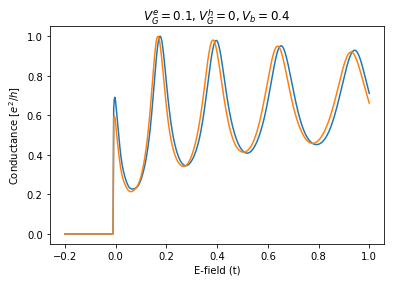

In [10]:
plt.figure()
plt.plot(energies,data)
plt.plot(energies2,data2)
#plt.yscale('log')
#plt.rcParams['figure.figsize']=[30/2.54,24/2.54]
plt.xlabel("E-field (t)")
plt.ylabel("Conductance [$e^2/h$]")
savefig('conductance_double_well_E.pdf')
plt.title('$V_G^e=0.1,V_G^h=0,V_b=0.4$')
plt.show()

In [11]:
#with open('double_well_Vb=0_Lb=1_a=1.txt', 'w') as f:
    N=51
    a=1.0
    L=a*N
    t0=1.0/(a*a)
    #fields = []
    data3 = []

    energies3 = np.linspace(-0.2,1.0,500)

    for energy in energies:

        syst = make_system(a0=a,length=N,t=t0,E=energy,VG_e=0.1,VG_h=0.0,VL=0.0,t_b=t0,Vb=0.4,L_b=1).finalized()

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst, 0.01)

        # compute the transmission probability from lead 0 to
        # lead 1
        #field=field/t0
        #fields.append(field)
        data3.append(smatrix.transmission(1, 0))
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))

In [15]:
#with open('double_well_Vb=0_Lb=1_a=1.txt', 'w') as f:
    N=51*2
    a=1.0
    L=a*N
    t0=1.0/(a*a)
    #fields = []
    data4 = []

    energies4 = np.linspace(-0.2,1.0,500)

    for energy in energies:

        syst = make_system(a0=a,length=N,t=t0,E=energy,VG_e=0.1,VG_h=0.0,VL=0.0,t_b=t0,Vb=0.4,L_b=1).finalized()

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst, 0.01)

        # compute the transmission probability from lead 0 to
        # lead 1
        #field=field/t0
        #fields.append(field)
        data4.append(smatrix.transmission(1, 0))
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))

In [19]:
#with open('double_well_Vb=0_Lb=1_a=1.txt', 'w') as f:
    N=51*3
    a=1.0
    L=a*N
    t0=1.0/(a*a)
    #fields = []
    data5 = []

    energies5 = np.linspace(-0.2,1.0,500)

    for energy in energies:

        syst = make_system(a0=a,length=N,t=t0,E=energy,VG_e=0.1,VG_h=0.0,VL=0.0,t_b=t0,Vb=0.4,L_b=1).finalized()

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst, 0.01)

        # compute the transmission probability from lead 0 to
        # lead 1
        #field=field/t0
        #fields.append(field)
        data5.append(smatrix.transmission(1, 0))
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))

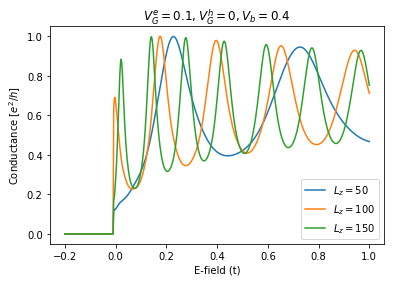

In [22]:
plt.figure()
plt.plot(energies3,data3)
plt.plot(energies4,data4)
plt.plot(energies5,data5)
#plt.yscale('log')
#plt.rcParams['figure.figsize']=[30/2.54,24/2.54]
plt.xlabel("E-field (t)")
plt.ylabel("Conductance [$e^2/h$]")
plt.title('$V_G^e=0.1,V_G^h=0,V_b=0.4$')
plt.legend(['$L_z=50$','$L_z=100$','$L_z=150$'])
savefig('conductance_double_well_E_L_dep.pdf')
plt.show()

<IPython.core.display.Javascript object>


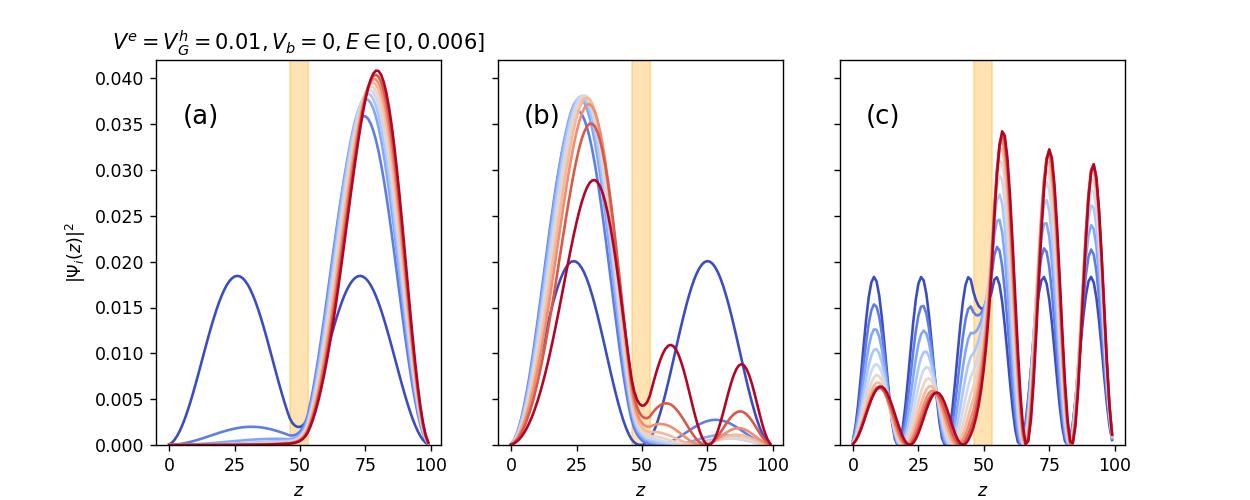

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'hspace':0}, figsize=(10, 4))
#plt.figure()
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]

N=100
a=1.0/0.5
L=a*N
t0=1.0/(a*a)

#-----------------------------------------------------------
ax1= plt.subplot(131)

for i, color in enumerate(colors, start=1):
    field=(i-1)*0.0006

    syst = make_system(a0=a,length=N,t=t0,E=field,VG_e=0.01,VG_h=0.01,VL=0.0,t_b=t0,Vb=0.0,L_b=8).finalized()
    ham = syst.hamiltonian_submatrix()
    eigv,evecs = LA.eigh(ham)

    im=[]
    for i in range(N):
        im.append(i)

    plt.plot(im,abs(evecs[:, 0])**2,color=color)
    #plt.plot(im,abs(evecs[:, 1])**2)
    
plt.xlabel("$z$")
plt.ylabel("$|\Psi_i(z)|^2$")

plt.text(5, 0.035, r'(a)', fontsize=15)

z=np.arange(46,53,0.01)
plt.fill_between(z,0.0,0.042, color='orange', alpha=0.3) 
gca().set_ylim(0.0,0.042)
plt.title('$V^e=V_G^h=0.01,V_b=0,E\in[0,0.006]$')
#-----------------------------------------------------------
ax2= plt.subplot(132)

for i, color in enumerate(colors, start=1):
    field=(i-1)*0.0006

    syst = make_system(a0=a,length=N,t=t0,E=field,VG_e=0.01,VG_h=0.01,VL=0.0,t_b=t0,Vb=0.0,L_b=8).finalized()
    ham = syst.hamiltonian_submatrix()
    eigv,evecs = LA.eigh(ham)

    im=[]
    for i in range(N):
        im.append(i)

    plt.plot(im,abs(evecs[:, 1])**2,color=color)
    #plt.plot(im,abs(evecs[:, 1])**2)
    
plt.xlabel("$z$")

plt.setp(ax2.get_yticklabels(), visible=False)

plt.text(5.0, 0.035, r'(b)', fontsize=15)

#plt.ylabel("$|\Psi_1(z)|^2$")
z=np.arange(46,53,0.01)
plt.fill_between(z,0.0,0.042, color='orange', alpha=0.3) 
gca().set_ylim(0.0,0.042)
#plt.title('$V_b=0,E\in[0,0.006]$')
#-----------------------------------------------------------
ax3= plt.subplot(133)

for i, color in enumerate(colors, start=1):
    field=(i-1)*0.0006

    syst = make_system(a0=a,length=N,t=t0,E=field,VG_e=0.01,VG_h=0.01,VL=0.0,t_b=t0,Vb=0.0,L_b=8).finalized()
    ham = syst.hamiltonian_submatrix()
    eigv,evecs = LA.eigh(ham)

    im=[]
    for i in range(N):
        im.append(i)

    plt.plot(im,abs(evecs[:, 4])**2,color=color)
    #plt.plot(im,abs(evecs[:, 1])**2)

plt.text(5.0, 0.035, r'(c)', fontsize=15)    
    
plt.xlabel("$z$")
#plt.ylabel("$|\Psi_2(z)|^2$")

plt.setp(ax3.get_yticklabels(), visible=False)

z=np.arange(46,53,0.01)
plt.fill_between(z,0.0,0.042, color='orange', alpha=0.3) 
gca().set_ylim(0.0,0.042)
#plt.title('$V_b=0,E\in[0,0.006]$')
#------------------------------------------------------
f.subplots_adjust(hspace=0)
savefig('wfun_double_well_E_z_dep.pdf')

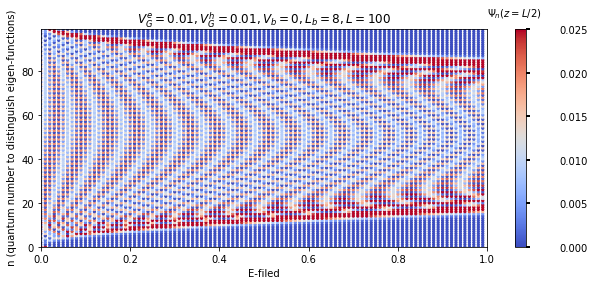

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'hspace':0}, figsize=(10, 4))
#plt.figure()

N=100
a=1.0/0.5
L=a*N
t0=1.0/(a*a)

ax1= plt.subplot(111)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0.0, 1.0, 100)]

fields=[]
im=[]
gss=[]
sn=[]

for i, color in enumerate(colors, start=1):
    field=(i-1)*0.01

    syst = make_system(a0=a,length=N,t=t0,E=field,VG_e=0.01,VG_h=0.01,VL=0.0,t_b=t0,Vb=0.0,L_b=8).finalized()
    ham = syst.hamiltonian_submatrix()
    evecs = LA.eigh(ham)[1]

    for j in range(N):
        im.append(j)
        fields.append(field)
        gs=abs(evecs[50,j-1])**2
        gss.append(gs)
        #sn.append(i-1)
        #print (i,j,field,gs)
        
    
    
plt.scatter(fields, im, c=gss, vmin=0, vmax=0.025, s=5, cmap=cmap)
    

plt.xlabel("E-filed")
plt.ylabel(" n (quantum number to distinguish eigen-functions)")
z=np.arange(46,53,0.01)
#plt.fill_between(z,0.0,0.02, color='orange', alpha=0.3) 
gca().set_ylim(0.0,99)
gca().set_xlim(0.0,1.0)
plt.title('$V^e_G=0.01,V^h_G=0.01,V_b=0,L_b=8,L=100$')
plt.text(1.0, 105.0,r'$\Psi_n(z=L/2)$',fontsize=10)
#-----------------------------------------------------------
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize= 10, pad=30, width=2)

savefig('wfun_double_well_E.pdf')

In [16]:
N=51*2
a=1.0
L=a*N
t0=1.0/(a*a)
fieldsm = []
data = []
kysm = []

energy=0.04

fields = np.linspace(-0.2,1.0,100)
kys = np.linspace(-0.2,0.2,100)

for field in fields:
    for ky in kys:

        syst = make_system(a0=a,length=N,t=t0,E=field,VG_e=0.1,VG_h=0.0,VL=0.0,t_b=t0,Vb=0.4,L_b=1).finalized()

        energyz=energy-((ky**2)/2.0)
        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst, energyz)

        # compute the transmission probability from lead 0 to lead 1
        data.append(smatrix.transmission(1, 0))
        fieldsm.append(field)
        kysm.append(ky)    

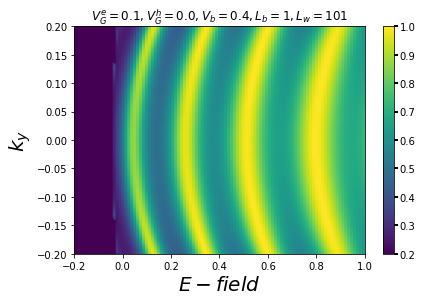

In [18]:
cmap = plt.get_cmap('viridis')

plt.scatter(fieldsm, kysm, c=data, vmin=0.2, vmax=1.0, s=20, cmap=cmap)  

plt.xlabel("$E-field$",fontsize=20)
plt.ylabel("$k_y$",fontsize=20)
gca().set_ylim(-0.2,0.2)
gca().set_xlim(-0.2,1.0)

plt.title('$V^e_G=0.1,V^h_G=0.0,V_b=0.4,L_b=1,L_w=101$')


cbar = plt.colorbar()

cbar.ax.tick_params(labelsize= 10, pad=2, width=2)

plt.subplots_adjust(left=0.15, right=0.99, top=0.95, bottom=0.16)

savefig('trans_double_well_E.pdf')